In [2]:

#imports

import numpy as np
import matplotlib.pylab as plt
from ipywidgets import Layout, interact, IntSlider
import time


nanometers_per_pixel = 46

psf_peak_pixel_size = 32

#PSF consts

res = 512
subpixels = 4

my_psf_res = res * subpixels + 1

#sin(x)/x
extreme = 4.49340945790906
my_psf_min = np.sin(extreme) / extreme

my_psf_peak_px = 9 #2.0 * extreme


my_psf_range = my_psf_peak_px / psf_peak_pixel_size * my_psf_res / 2.0 / subpixels

xs = np.linspace(-my_psf_range, my_psf_range, my_psf_res, dtype=np.longdouble)

def my_psf(x):
    return((np.sin(x, dtype=np.longdouble) / x) - my_psf_min) / (1.0 - my_psf_min)


In [3]:
#PSF generation

startTime = time.time()

my_psf_img = np.zeros((my_psf_res, my_psf_res), dtype=np.longdouble)
print("Dtype precision: " + str(np.dtype(np.longdouble).itemsize) + " bytes")

for x in range(my_psf_res):
    print(str(x), end = '\r')
    for y in range(my_psf_res):
        vzd = xs[x] ** 2 + xs[y] ** 2
        if vzd == 0:
            my_psf_img[x, y] = 1.0
        else:            
            my_psf_img[x, y] = my_psf(np.sqrt(vzd))

#Segment PSF
PSF_offs = np.zeros((subpixels, subpixels, res, res))
                    
                    
for offx in range(subpixels):
    for offy in range(subpixels):
        PSF_offs[offy, offx, :, :] = my_psf_img[offy:-1:subpixels,offx:-1:subpixels]
                    
np.save("PSF_subpx.npy", PSF_offs)
            
executionTime = (time.time() - startTime)
print("Done in " + str(executionTime) + " s")

def plot_step(offx, offy):
    plt.imshow(PSF_offs[offy, offx, :, :])
    plt.show()
    
    
interact(plot_step, offx=IntSlider(min=0, max=subpixels - 1), offy=IntSlider(min=0, max=subpixels-1));

Dtype precision: 16 bytes
Done in 10.004241943359375 s


interactive(children=(IntSlider(value=0, description='offx', max=3), IntSlider(value=0, description='offy', ma…

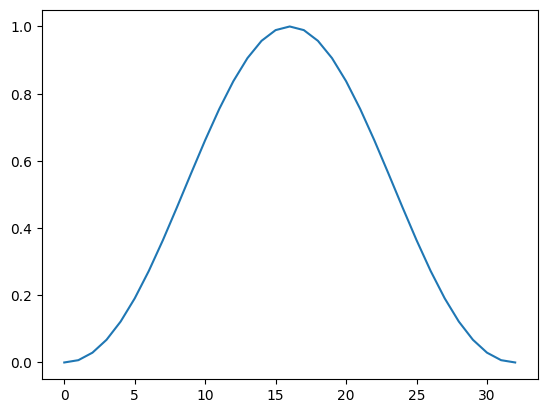

[6.88201978e-06 6.87333932e-03 2.91818103e-02 6.75678903e-02
 1.21801481e-01 1.90757937e-01 2.72442057e-01 3.64064845e-01
 4.62169604e-01 5.62800787e-01 6.61706208e-01 7.54560990e-01
 8.37200138e-01 9.05845874e-01 9.57316118e-01 9.89201477e-01
 1.00000000e+00 9.89201477e-01 9.57316118e-01 9.05845874e-01
 8.37200138e-01 7.54560990e-01 6.61706208e-01 5.62800787e-01
 4.62169604e-01 3.64064845e-01 2.72442057e-01 1.90757937e-01
 1.21801481e-01 6.75678903e-02 2.91818103e-02 6.87333932e-03
 6.88201978e-06]
(0, 1, 251, 250)


In [20]:
width = 32
w1 = res//2 - width//2
w2 = res//2 + width//2

plt.plot(PSF_offs[0, 0, res//2, w1:w2+1])
plt.show()

print(PSF_offs[0, 0, res//2, w1:w2+1])
idx = np.argmin(np.abs(PSF_offs - 0.5))
print(np.unravel_index(idx, PSF_offs.shape))

In [3]:
#Save in 32bit precision
np.save("PSF_subpx_fl32.npy", PSF_offs.astype(np.float32))

In [2]:
#Load
PSF_offs = np.load("PSF_subpx_fl32.npy")

In [4]:
#Zoomed in plot
width = 6
def zoomed_plot_step(offx, offy):
    print(offx, offy)
    
    subx = int(offx % subpixels)
    suby = int(offy % subpixels)
    ofpx = int(offx / subpixels)
    ofpy = int(offy / subpixels)
    
    w1 = int(res/2 - width/2)
    w2 = int(res/2 + width/2)
    
    
    plt.imshow(PSF_offs[suby, subx, w1 + ofpy:w2 + ofpy, w1 + ofpx:w2 + ofpx])
    plt.show()
    
    
interact(zoomed_plot_step, offx=IntSlider(min=0, max=subpixels * 2), offy=IntSlider(min=0, max=subpixels * 2));